In [9]:
import pandas as pd
import numpy as np
import lux

import copy

import csv
import sqlite3

In [10]:
df = pd.read_csv("./data/test_amazon_small.csv")
df.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [ ]:
re.sub(r"[.]+",". ", df["review_text"].iloc[54]), df["review_text"].iloc[54]

In [70]:
df_duplicate = pd.DataFrame({"review":df["review_text"], "polarity":df["class_ind"]})#copy.deepcopy(df)
# df_duplicate = df_duplicate.iloc[:8000]
# df_duplicate.columns = ['class_ind', 'review_title', 'review_text']
df_duplicate.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [139]:
df.to_csv("test_amazon_small.csv", index=False)

A. Using SQL operation to explore
--------------------

1. Get a view of table
2. Explore some insights from dataset
3. Find answer to questions

In [6]:
# Connecting to sqlite
conn = sqlite3.connect('geeks2.db')
  
# Creating a cursor object using the 
# cursor() method
cursor = conn.cursor()
  
# Creating table
table ="""CREATE TABLE STUDENT(NAME VARCHAR(255), CLASS VARCHAR(255),
SECTION VARCHAR(255));"""
cursor.execute(table)
  
# Queries to INSERT records.
cursor.execute('''INSERT INTO STUDENT VALUES ('Raju', '7th', 'A')''')
cursor.execute('''INSERT INTO STUDENT VALUES ('Shyam', '8th', 'B')''')
cursor.execute('''INSERT INTO STUDENT VALUES ('Baburao', '9th', 'C')''')
  
# Display data inserted
print("Data Inserted in the table: ")
data=cursor.execute('''SELECT * FROM STUDENT''')
for row in data:
    print(row)
  
# Commit your changes in the database    
conn.commit()
  
# Closing the connection
conn.close()

Data Inserted in the table: 
('Raju', '7th', 'A')
('Shyam', '8th', 'B')
('Baburao', '9th', 'C')


In [7]:
# creating connection
amz_con = sqlite3.connect("amazon.db")
cursor = amz_con.cursor()

print(amz_con.total_changes)

0


In [32]:
# Creating table
table ="""CREATE TABLE Amazon_Polarity(class_ind INT, review_title VARCHAR(455),
review_text VARCHAR(955));"""
cursor.execute(table)

OperationalError: table Amazon_Polarity already exists

In [44]:
for ind, row in df.loc[:1].iterrows():
    # Queries to INSERT records.
    cursor.execute(f'''INSERT INTO STUDENT VALUES ('{row[col[0]]}', '{row[col[1]]}', '{row[col[2]]}')''')

OperationalError: near "t": syntax error

In [36]:
col = df.columns
for ind, row in df.loc[:2].iterrows():
    print(row[col[0]], '====',row[col[1]],'====', row[col[2]])

2 ==== One of the best game music soundtracks - for a game I didn't really play ==== Despite the fact that I have only played a small portion of the game, the music I heard (plus the connection to Chrono Trigger which was great as well) led me to purchase the soundtrack, and it remains one of my favorite albums. There is an incredible mix of fun, epic, and emotional songs. Those sad and beautiful tracks I especially like, as there's not too many of those kinds of songs in my other video game soundtracks. I must admit that one of the songs (Life-A Distant Promise) has brought tears to my eyes on many occasions.My one complaint about this soundtrack is that they use guitar fretting effects in many of the songs, which I find distracting. But even if those weren't included I would still consider the collection worth it.
1 ==== Batteries died within a year ... ==== I bought this charger in Jul 2003 and it worked OK for a while. The design is nice and convenient. However, after about a year,

In [14]:
with open("amazon_small.csv", 'r') as file:
    data = csv.DictReader(file)
    amz_review = [(i, i, i) for i in data]
    print(amz_review)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [21]:
# cursor.execute('create table amazon_review(class_ind int, review_title varchar2(100), review_text varchar2(9000))')
parameter_list = [({'class_ind', 'review_title', 'review_text'})]
with amz_con:
    cursor.executemany(
        "insert into amazon_review (class_ind, review_title, review_text) VALUES(?, ?, ?);", 
        parameter_list)
    amz_con.commit()
# cursor.execute("select * from student;")

ValueError: parameters are of unsupported type

In [ ]:
amz_review

B. DATA Processing
----------------
Steps of processing text dataset
1. Loading
2. Cleaning
3. Tokenization
4. Vectorization/Word Embedding

In [11]:
# To lemmatize whole sentence
# !pip3 install -U pywsd
# !pip3 install -U wn==0.0.22
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [144]:
import string
import re
import tqdm
import time

from nltk import word_tokenize
import nltk
nltk.download('punkt')
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from pywsd.utils import lemmatize_sentence

# for tokenization
from spacy.lang.en import English
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import torchtext
from torchtext.data.utils import get_tokenizer
from gensim.utils import tokenize

# for vectorization
from gensim import models
import dataloader
import fasttext
from allennlp.modules.elmo import Elmo, batch_to_ids
from transformers import GPT2TokenizerFast, BertTokenizer

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
df.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [98]:
for ind, row in df.loc[:10].iterrows():
    print(row['review_title'],"========", row['review_text'])

One of the best game music soundtracks - for a game I didn't really play ======== Despite the fact that I have only played a small portion of the game, the music I heard (plus the connection to Chrono Trigger which was great as well) led me to purchase the soundtrack, and it remains one of my favorite albums. There is an incredible mix of fun, epic, and emotional songs. Those sad and beautiful tracks I especially like, as there's not too many of those kinds of songs in my other video game soundtracks. I must admit that one of the songs (Life-A Distant Promise) has brought tears to my eyes on many occasions.My one complaint about this soundtrack is that they use guitar fretting effects in many of the songs, which I find distracting. But even if those weren't included I would still consider the collection worth it.
Batteries died within a year ... ======== I bought this charger in Jul 2003 and it worked OK for a while. The design is nice and convenient. However, after about a year, the b

In [201]:
# Cleaning
def clean_text(text):
    if text is None:
        text = "empty"
    else:
        text = str(text)
    text = re.sub(r"[.]+"," . ", text)
    translator = str.maketrans('','', string.punctuation)
    clean_txt = text.translate(translator)
    lemmatizer = WordNetLemmatizer()
    #print(clean_txt,[lemmatizer.lemmatize(w) for w in word_tokenize(clean_txt)])
    lemmatized = [lemmatizer.lemmatize(word) for word in word_tokenize(clean_txt)]
    return " ".join(lemmatized)

In [138]:
df["review"] = df["review"].apply(clean_text)
# df["review_text"] = df["review_text"].apply(clean_text)
df.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [7]:
# Tokenization
# 1. using split() function
# 2. using nltk and spacy library
# 3. using countvectorizer
# 4. using Gensim
# 5. using pytorch torchtext
def tokenization(text,method="split"):
    if method == 'split':  #It won't consider punctuation of words as token
        return text.split()
    elif method == 'nltk': # It will consider punctuations as tokens
        return word_tokenize(text)
    elif method == "spacy":
        nlp = English()
        doc = nlp(text)
        tokens = [token.text for token in doc]
        return tokens
    elif method == 'countvector':
        cv = CountVectorizer(stop_words='english')
        cv_matrix = cv.fit_transform(df['review_text'].iloc[:50])
        return pd.DataFrame(cv_matrix.toarray(),columns=cv.get_feature_names()).columns
    elif method == 'gensim':
        return list(tokenize(text))
    elif method == 'torchtext':
        tokenizer = get_tokenizer("basic_english")
        return tokenizer(text)

In [8]:
tokenizer_methods = ['split', 'nltk', 'spacy', 'countvector','gensim', 'torchtext']
for meth in tokenizer_methods:
    text = df["review_text"].iloc[55]
    tokens = tokenization(text, method=meth)
    print(f"Text: {text}, \nMethod: {meth} \nOutput: {tokens}\nLength_of_token: {len(tokens)}")
    print("===========================================================================")

Text: I had never read this author but knew of many who did When I read that this book was being made into a movie it seemed a good opportunity to read her before seeing the screen mess up her work Now I pray that the screen does soI was extremely disappointed with this work It is unrealistic fails to capture the reader and at points when I should have been completely engrossed left me struggling with whether I wanted to pick it up I hope she has written better than this or else there are a lot of people who have not bothered reading some of the strong authors availableHer characters are not sympathetic they do not draw the readers attention and they are dull in overall scope I have too many other good books to read before I pick up another book from this author, 
Method: split 
Output: ['I', 'had', 'never', 'read', 'this', 'author', 'but', 'knew', 'of', 'many', 'who', 'did', 'When', 'I', 'read', 'that', 'this', 'book', 'was', 'being', 'made', 'into', 'a', 'movie', 'it', 'seemed', 'a',

In [206]:
# Common vectorisation techniques/ word embeddinh(Represent words as semantically-meaningful dense real-valued vectors.)
# 1. Count vectorization: Bag of words
# 2. N-Grams,
# 3. TF-IDF
# 4. Word2Vec
#    a. Skip Gram
#    b. CBOW
# 5. Glove
# 6. FastText
# 7. ELMO
# 8. GPT-2
# 9. BERT

#resources: 
# https://neptune.ai/blog/word-embeddings-guide 
# https://huggingface.co/course/chapter1/1
# https://medium.com/@dhartidhami/understanding-bert-word-embeddings-7dc4d2ea54ca
# https://github.com/jina-ai/clip-as-service

# Tensorflow Embedding space: http://projector.tensorflow.org/
def vectorisation(text, method="BOW"):
    if method == "BOW":
        cv = CountVectorizer()
        X = cv.fit_transform(text)
        x = X.toarray()
        vocabs = sorted(cv.vocabulary_.keys())
        print("x:",x, "\nvocabs:",vocabs)
        return x, vocabs
    
    elif method == "ngrams":
        cv = CountVectorizer(ngram_range=(2, 2))
        X = cv.fit_transform(text)
        x = X.toarray()
        vocabs = sorted(cv.vocabulary_.keys())
        print("x:",x, "\nvocabs:",vocabs)
        return x, vocabs
    
    elif method == "tfidf":
        tfidf = TfidfVectorizer()
        tranformed = tfidf.fit_transform(text)
        tfidf_dataframe = pd.DataFrame(
            tranformed[0].T.todense(),
            index=tfidf.get_feature_names(),
            columns=["TF-IDF"],
        )
        tfidf_dataframe = tfidf_dataframe.sort_values("TF-IDF", ascending=False)
        print(tfidf_dataframe)
        return tfidf_dataframe
    
    elif method == "word2vec":
        sentence = [sent.split() for sent in text]
        w2v_model = models.Word2Vec(
            sentences=sentence, vector_size=100, window=5, min_count=1, workers=7, epochs=10
        )
        words = [word for sent in sentence for word in sent if len(word) >= 10][:15]
        #print(w2v_model.)
        for wrd in words:
            print(f"Similar words search for : {wrd}")
            sim_words = w2v_model.wv.most_similar(wrd, topn=5)
            sim_list = [wrds for wrds in sim_words]
            print(f"List of similar words : {sim_list}")
        print(f"Words list: {words}")
        X = w2v_model.wv[words]
        pca = PCA(n_components=2)
        result = pca.fit_transform(X)
        plt.scatter(result[:, 0], result[:, 1])
        for i, word in enumerate(words):
            plt.annotate(word, xy=(result[i, 0], result[i, 1]))
        plt.show()
        return X
        
    elif method == "glove":
        #error: https://stackoverflow.com/questions/66516388/attributeerror-module-torchtext-data-has-no-attribute-field
        embed_d = {}
        glv = glove_embed()
        vocab_diction = dict(glv.TEXT.vocab.freqs)
        #print(vocab_diction)
        sentence = [sent.split() for sent in text]
        words = {}
        for sent in sentence:
            sent = clean_text(sent)
            for word in sent.split():
                try:
                    words[word] = vocab_diction[word]
                except KeyError as K:
                    print(word, "Key error raised")
        print(words)
        return words
    
    elif method == "fastext":
        #Reference: https://thinkinfi.com/fasttext-word-embeddings-python-implementation/#:~:text=FastText%20(an%20extension%20of%20word2vec,still%20shared%20with%20other%20words.
        tokenizer = nltk.WordPunctTokenizer()
        word_tokens = [tokenizer.tokenize(sent) for sent in tqdm.tqdm(text)]
        embedding_size = 300
        window_size = 5
        min_word = 5
        down_sampling = 1e-2
        
        start = time.time()
        fastext_model = models.FastText(word_tokens,
                      vector_size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      workers = 6,
                      sg=1,
                      epochs=100)
        end = time.time()
        print("Total_time taken to train model: ",end-start)
        
        words_vectors = [(word, fastext_model.wv.get_vector(word)) for sent in text for word in sent.split() if len(word) >= 10][:10]
        print("words_vectors: ",words_vectors)
        return fastext_model
    
    elif method == "elmo":
        #Reference: https://towardsdatascience.com/pytorch-elmo-844d2391a0b2,  https://guide.allennlp.org/
        options_file = "./embeddings/elmo_2x4096_512_2048cnn_2xhighway_options.json"
        weight_file = "embeddings/elmo_2x4096_512_2048cnn_2xhighway_weights.hdf5"
        # Note the "1", since we want only 1 output representation for each token.
        elmo = Elmo(options_file, weight_file, 1, dropout=0)

        # use batch_to_ids to convert sentences to character ids
        sentences = [['First', 'sentence', '.'], ['Another', '.']]
        character_ids = batch_to_ids(sentences)

        embeddings = elmo(character_ids)
        print("Character_id: ",character_ids,"\nEmbedding: ",embeddings)
        return embeddings
    elif method == "gpt2":
        #https://huggingface.co/docs/transformers/model_doc/gpt2
        tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")
        sentence = [words for sent in text for words in sent.split()]
        embed = tokenizer(sentence)["input_ids"]
        embedding_list = [(words, embed[ind]) for ind, words in enumerate(sentence)]
        print(embedding_list)
        return embedding_list
    elif method == "bert":
        #reference: https://github.com/huggingface/transformers/issues/1950
        tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        input_ids = tokenizer.encode(text)
        w_vector = torch.tensor(input_ids).unsqueeze(0).to("cuda")
        print(w_vector.shape, [sent.split() for sent in text], len([sent.split() for sent in text]))
        return w_vector

In [208]:
embed = vectorisation(df["review"].iloc[:1].tolist(), method="bert")
print("embedding:", embed)

torch.Size([1, 3]) [['Despite', 'the', 'fact', 'that', 'I', 'have', 'only', 'played', 'a', 'small', 'portion', 'of', 'the', 'game', 'the', 'music', 'I', 'heard', 'plus', 'the', 'connection', 'to', 'Chrono', 'Trigger', 'which', 'wa', 'great', 'a', 'well', 'led', 'me', 'to', 'purchase', 'the', 'soundtrack', 'and', 'it', 'remains', 'one', 'of', 'my', 'favorite', 'album', 'There', 'is', 'an', 'incredible', 'mix', 'of', 'fun', 'epic', 'and', 'emotional', 'song', 'Those', 'sad', 'and', 'beautiful', 'track', 'I', 'especially', 'like', 'a', 'there', 'not', 'too', 'many', 'of', 'those', 'kind', 'of', 'song', 'in', 'my', 'other', 'video', 'game', 'soundtrack', 'I', 'must', 'admit', 'that', 'one', 'of', 'the', 'song', 'LifeA', 'Distant', 'Promise', 'ha', 'brought', 'tear', 'to', 'my', 'eye', 'on', 'many', 'occasion', 'My', 'one', 'complaint', 'about', 'this', 'soundtrack', 'is', 'that', 'they', 'use', 'guitar', 'fretting', 'effect', 'in', 'many', 'of', 'the', 'song', 'which', 'I', 'find', 'distra

METHOD:  BOW
x: [[1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1
  1 2 2 1 1 1 1 3 1 1 1 1 4 1 1 7 1 3 1 1 1 1 1 1 1 1 1 1 4 3 1 1 3 8 2 1
  1 3 3 1 1 1 1 1 1 1 1 2 1 1]] 
vocabs: ['about', 'admit', 'album', 'an', 'and', 'beautiful', 'brought', 'but', 'chrono', 'collection', 'complaint', 'connection', 'consider', 'despite', 'distant', 'distracting', 'effect', 'emotional', 'epic', 'especially', 'even', 'eye', 'fact', 'favorite', 'find', 'fretting', 'fun', 'game', 'great', 'guitar', 'ha', 'have', 'heard', 'if', 'in', 'included', 'incredible', 'is', 'it', 'kind', 'led', 'lifea', 'like', 'many', 'me', 'mix', 'music', 'must', 'my', 'not', 'occasion', 'of', 'on', 'one', 'only', 'other', 'played', 'plus', 'portion', 'promise', 'purchase', 'remains', 'sad', 'small', 'song', 'soundtrack', 'still', 'tear', 'that', 'the', 'there', 'they', 'this', 'those', 'to', 'too', 'track', 'trigger', 'use', 'video', 'wa', 'well', 'werent', 'which', 'worth', 'would']
Total time:  0.001

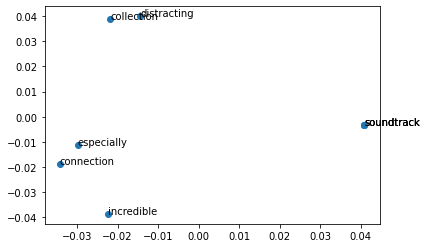

Total time:  0.12409114837646484
METHOD:  glove
Length of TRAIN_data: 8000,Length of TEST_data: 4000 
Unique tokens in :
TEXT vocab:4531,
LABEL vocab:2
Label vocab_freq: Counter({'2': 4079, '1': 3921})
wa Key error raised
LifeA Key error raised
werent Key error raised
{'Despite': 20, 'the': 27103, 'fact': 237, 'that': 6511, 'I': 16618, 'have': 3912, 'only': 1324, 'played': 140, 'a': 14755, 'small': 255, 'portion': 11, 'of': 12832, 'game': 245, 'music': 639, 'heard': 221, 'plus': 56, 'connection': 50, 'to': 14660, 'Chrono': 1, 'Trigger': 2, 'which': 903, 'great': 1573, 'well': 985, 'led': 25, 'me': 1660, 'purchase': 193, 'soundtrack': 65, 'and': 16414, 'it': 11030, 'remains': 23, 'one': 2734, 'my': 2986, 'favorite': 229, 'album': 654, 'There': 514, 'is': 11395, 'an': 1753, 'incredible': 53, 'mix': 46, 'fun': 258, 'epic': 30, 'emotional': 36, 'song': 340, 'Those': 22, 'sad': 97, 'beautiful': 144, 'track': 117, 'especially': 193, 'like': 2180, 'there': 1165, 'not': 3934, 'too': 860, 'many

100%|██████████| 1/1 [00:00<00:00, 13706.88it/s]


Total_time taken to train model:  2.327190637588501
words_vectors:  [('connection', array([ 2.40453719e-05,  1.75593945e-04,  4.93522850e-04, -4.86008765e-04,
       -9.40322425e-05,  3.64242325e-04, -5.41732705e-04,  1.21480596e-04,
       -2.86420051e-04,  8.18315195e-04,  7.38360861e-04,  8.80507869e-05,
       -2.11404855e-04, -2.69254315e-07,  3.26417881e-04,  1.92177060e-04,
        1.43540092e-04, -4.08549036e-04,  4.49835992e-04, -2.90448486e-04,
        3.06705246e-04,  4.96631139e-04,  2.59523513e-05, -3.01713590e-04,
        2.57560478e-05,  8.44544847e-05, -4.24579002e-06,  3.21717205e-04,
        7.12735200e-05,  1.76645626e-04, -8.11148711e-05, -3.47809895e-04,
       -5.28002798e-04,  2.62162648e-04, -3.66770400e-04,  2.16364322e-04,
        4.33875044e-04, -7.09755986e-05, -9.78727592e-04, -1.65782752e-04,
        2.83704518e-04,  8.21952417e-05,  4.32192581e-04, -3.58485064e-04,
        4.29003616e-04,  9.96982544e-06, -9.90593107e-05, -3.01892112e-04,
       -9.411516

In [209]:
methods = ["bert","gpt2","elmo","fastext", "glove", "word2vec", "tfidf", "ngrams", "BOW"]
for m in methods[::-1]:
    print("METHOD: ", m)
    start = time.time()
    vectorisation(df["review"].iloc[:1].tolist(), method=m)
    end = time.time()
    print("Total time: ", end-start)
    print("====================================")

In [181]:
import spacy
import torch

from torchtext.legacy import data

SEED = 1234

torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchtext

import torch
from allennlp.data import Token, Vocabulary, TokenIndexer, Tokenizer
from allennlp.modules.token_embedders import (
    Embedding,
    TokenCharactersEncoder,
    ElmoTokenEmbedder,
    PretrainedTransformerEmbedder,
    PretrainedTransformerMismatchedEmbedder,
)
from allennlp.data.token_indexers import (
    SingleIdTokenIndexer,
    TokenCharactersIndexer,
    ELMoTokenCharactersIndexer,
    PretrainedTransformerIndexer,
    PretrainedTransformerMismatchedIndexer,
)
from allennlp.data.fields import ListField, TextField
from allennlp.modules.text_field_embedders import BasicTextFieldEmbedder

import nltk

import random
from sklearn.metrics import classification_report

import pyprind
%matplotlib inline  

Issue:

* https://github.com/pytorch/text/issues/1342
==> solution: 
torch                         1.10.0
torchtext                     0.8.0

In [ ]:
# !python -m spacy download en_core_web_sm
# !python -m spacy download en

In [189]:
spacy = spacy.load("en_core_web_sm")
is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')
print(is_cuda, device)

True cuda


In [185]:
# ALLEN NLP ELMO model
# References:
# 1. https://github.com/allenai/allennlp/issues/1737
# 2. https://allenai.github.io/allennlp-website/interpret
# 3. https://guide.allennlp.org/
class elmo:
    def __init__(self, tokens=[tk for tk in df["review"].iloc[10].split()], transformer_model="google/reformer-crime-and-punishment"):
        # This pattern is typically used in cases where your input data is already
        # tokenized, so we're showing that here.
        self.text_tokens = tokens#[tk for tk in df["review"].iloc[10].split()]#["This", "is", "some", "frandibulous", "text", "."]
        self.tokens = [Token(x) for x in self.text_tokens]
        #print(self.tokens)

        # We're using a very small transformer here so that it runs quickly in binder. You
        # can change this to any transformer model name supported by Hugging Face.
        self.transformer_model = transformer_model
        
        # Represents the list of word tokens with a sequences of wordpieces as determined
        # by the transformer's tokenizer.  This actually results in a pretty complex data
        # type, which you can see by running this.  It's complicated because we need to
        # know how to combine the wordpieces back into words after running the
        # transformer.
        self.indexer = PretrainedTransformerMismatchedIndexer(model_name=self.transformer_model)

        self.text_field = TextField(self.tokens, {"transformer": self.indexer})
        self.text_field.index(Vocabulary())
        self.token_tensor = self.text_field.as_tensor(self.text_field.get_padding_lengths())

        # There are two key things to notice in this output.  First, there are two masks:
        # `mask` is a word-level mask that gets used in the utility functions described in
        # the last section of this chapter.  `wordpiece_mask` gets used by the `Embedder`
        # itself.  Second, there is an `offsets` tensor that gives start and end wordpiece
        # indices for the original tokens.  In the embedder, we grab these, average all of
        # the wordpieces for each token, and return the result.
        print("Indexed tensors:", self.token_tensor)

    def embedding(self):
        embedding = PretrainedTransformerMismatchedEmbedder(model_name=self.transformer_model)

        embedder = BasicTextFieldEmbedder(token_embedders={"transformer": embedding})

        tensor_dict = self.text_field.batch_tensors([self.token_tensor])
        embedded_tokens = embedder(tensor_dict)
        print("Embedded tokens size:", embedded_tokens.size())
        #print("Embedded tokens:", embedded_tokens)
        return embedder, embedded_tokens
        
# FastText implementation
class fast_texTrain:
    def __init__(self, train_text = df['review'].tolist(), train_label = df['polarity'].tolist()):
        self.all_text = train_text
        self.all_label = train_label
        self.fast_datapoints = []
        #Need to convert data into this format: __label__<label value><space><associated datapoint>
        for i in range(len(self.all_text)):
            sample = "__label__" + str(self.all_label[i]) + " " + self.all_text[i]
            self.fast_datapoints.append(sample)
        self.filename = "train_fastext" + time.strftime("%Y-%b-%a %H-%M-%S", time.gmtime()) + ".txt"
        with open(self.filename, "w") as file:
            for data in self.fast_datapoints:
                file.write(data)
                file.write("\n")
            file.close()
    def train(self):
        model = fasttext.train_supervised(self.filename)
        return model
            
# Reference: https://www.kaggle.com/code/kuldeep7688/simple-rnn-using-glove-embeddings-in-pytorch
# Simple RNN model using GLOVe embedding for sentiment classification
class glove_embed:
    def __init__(self):
        self.TEXT = data.Field(sequential=True, tokenize="spacy")
        self.LABEL = data.LabelField(sequential=False, dtype=torch.long)
        self.train_data, self.test_data = data.TabularDataset.splits(path="./data/", train="amazon_small.csv",
                                                test="test_amazon_small.csv", format="csv",
                                                skip_header=True,
                                                fields=[('Text', self.TEXT),('Label', self.LABEL)])
        self.TEXT.build_vocab(self.train_data, 
                              vectors=torchtext.vocab.Vectors("./embeddings/glove.6B.300d.txt"),
                             max_size=20000, min_freq=10)
        self.LABEL.build_vocab(self.train_data)
        print(f"Length of TRAIN_data: {len(self.train_data)},Length of TEST_data: {len( self.test_data)}",
             f"\nUnique tokens in :\nTEXT vocab:{len(self.TEXT.vocab)},\nLABEL vocab:{len(self.LABEL.vocab)}")

        self.Batch_size = 10
        self.device = device
        self.train_iterator, self.test_iterator = data.BucketIterator.splits((self.train_data, self.test_data),
                                                                            sort_key = lambda x: len(x.Text),
                                                                            batch_size = self.Batch_size,
                                                                            device = self.device)
        print(f"Label vocab_freq: {self.LABEL.vocab.freqs}")
        
    def tokenizer(self, text):
        return [tok for tok in word_tokenize(text)]

class RNN(nn.Module):
    def __init__(self, in_dim, emb_dim, hid_dim, out_dim):
        super().__init__()
        self.embedding = nn.Embedding(in_dim, emb_dim)
        self.rnn = nn.RNN(emb_dim, hid_dim)
        self.fc = nn.Linear(hid_dim, out_dim)
    def forward(self, x):
        # dimension of x: [sentence_len, batch_size]
        embedded = self.embedding(x)  # dimension of embedded: [sentence_len, batch_size, embed_dim] 
        output, hidden = self.rnn(embedded) # dimension of output and hidden: [sentence_len, batch_size, hid_dim] , [1, batch_size, embed_dim]
        assert torch.equal(output[-1,:,:], hidden.squeeze(0))
        output =  self.fc(hidden)
        return out
    def train(self, model, iterator, optimizer, criterion):
        pass
    def evaluate(self,model, iterator,criterion):
        pass

In [59]:
tokens = [words for sent in df["review"] for words in sent.split(" ")][:124288]
print(tokens[:10], len(tokens))

['Despite', 'the', 'fact', 'that', 'I', 'have', 'only', 'played', 'a', 'small'] 124288


In [60]:
elmo_model = elmo(tokens=tokens)
embedded_tokens = elmo_model.embedding()

Indexed tensors: {'transformer': {'token_ids': tensor([216,  42, 279,  ...,  76,  48,  27]), 'mask': tensor([True, True, True,  ..., True, True, True]), 'type_ids': tensor([0, 0, 0,  ..., 0, 0, 0]), 'wordpiece_mask': tensor([True, True, True,  ..., True, True, True]), 'offsets': tensor([[     0,      4],
        [     5,      5],
        [     6,      7],
        ...,
        [307242, 307243],
        [307244, 307250],
        [307251, 307251]])}}
Embedded tokens size: torch.Size([1, 124288, 512])


In [239]:
glove_model = glove_embed()
TEXT = glove_model.TEXT
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 300
HIDDEN_DIM = 374
OUTPUT_DIM = 2

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)

/opt/conda/lib/python3.8/site-packages/torchtext/data/utils.py:123: UserWarning:Spacy model "en" could not be loaded, trying "en_core_web_sm" instead


Length of TRAIN_data: 8000,Length of TEST_data: 4000 
Unique tokens in :
TEXT vocab:4532,
LABEL vocab:2
Label vocab_freq: Counter({'2': 4079, '1': 3921})
